In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [2]:
for a, b, c in os.walk(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3'):
    for filename in c:
        if os.path.exists(f'{a}\\{filename}'):
            print(filename)

application_test.csv
application_train.csv
bureau.csv
bureau_balance.csv
credit_card_balance.csv
HomeCredit_columns_description.csv
installments_payments.csv
POS_CASH_balance.csv
previous_application.csv
sample_submission.csv


In [3]:
apptest =pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\application_test.csv')
apptrain =pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\application_train.csv')
app_curr = pd.concat([apptest, apptrain], sort = True)
bureau = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\bureau.csv')
bureaubal = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\bureau_balance.csv')
cc_bal  = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\bureau_balance.csv')
Installment_payments = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\installments_payments.csv')
POS_cash_bal = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\POS_CASH_balance.csv')
previous_app = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\previous_application.csv')
sample_submission = pd.read_csv(r'C:\Users\Paulo Abalos\Downloads\datasets\hackathon3\sample_submission.csv')

In [4]:
'''
1.Look at the distributions of the following variables: AMT_CREDIT, AMT_INCOME_TOTAL, AMT_GOODS_PRICE, Name of type of the Suite.
2.Is data balanced or imbalanced in terms of loan default status? (Provide a plot)
3.Choose a relevant plot type and visualize the following variables: Types of loan, Purpose of loan, Income sources of Applicant's 
who applied for loan, Family Status ofApplicant's who applied for loan, Occupation of Applicant's who applied for loan,
Education of Applicant's who applied for loan, housing type.
4.Explore the same variables as above in terms of whether a loan was repayed or not (Use relevant plots)
5.Explore relationships between variables (Use relevant plots)
'''
AMT_CREDIT_df = apptrain[['AMT_CREDIT','SK_ID_CURR']]
AMT_INCOME_TOTAL_df = apptrain[['AMT_INCOME_TOTAL','SK_ID_CURR','TARGET']]
AMT_GOODS_PRICE_df = apptrain[['AMT_GOODS_PRICE','SK_ID_CURR','TARGET']] # for consumer loans only price of goods the loan is for
NAME_TYPE_SUITE_df = apptrain[['NAME_TYPE_SUITE','SK_ID_CURR','TARGET']]

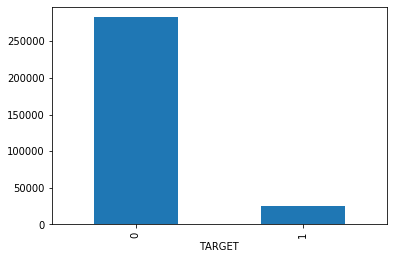

In [5]:
AMT_INCOME_TOTAL_df.groupby('TARGET')['AMT_INCOME_TOTAL'].size().plot.bar()
#amt income total

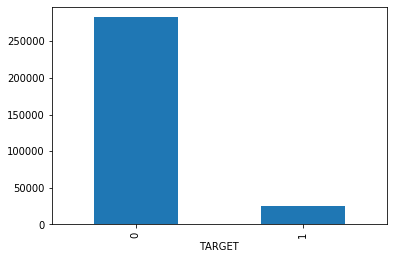

In [6]:
AMT_GOODS_PRICE_df.groupby('TARGET')['AMT_GOODS_PRICE'].size().plot.bar()

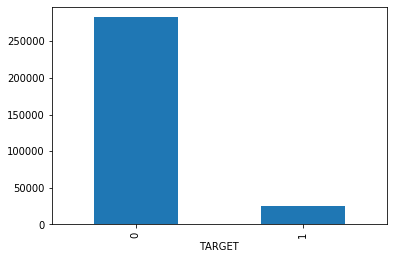

In [7]:
amt_credit = pd.DataFrame(AMT_CREDIT_df.groupby('SK_ID_CURR')['AMT_CREDIT'].sum())
amt_income = pd.DataFrame(AMT_INCOME_TOTAL_df.groupby('SK_ID_CURR')[['AMT_INCOME_TOTAL', 'TARGET']].mean())
amt_credit_total = amt_income.join(amt_credit)
amt_credit_total.groupby('TARGET')['AMT_CREDIT'].size().plot.bar()

In [8]:
'''
1 - 3.Choose a relevant plot type and visualize the following variables: Types of loan, Purpose of loan, Income sources 
of Applicant's who applied for loan, Family Status ofApplicant's who applied for loan, Occupation of Applicant's who applied
for loan, Education of Applicant's who applied for loan, housing type.
'''
# for types of loan there are 2 sources one from home credit and one from the credit bureau
CONTRACT_TYPE = previous_app[['NAME_CONTRACT_TYPE','SK_ID_CURR']] # from homecredit
CREDIT_TYPE_df = bureau[['CREDIT_TYPE', 'SK_ID_CURR']] # from the bureau (might not need more than 70% are consumer credit) CREDIT_TYPE_df.groupby('CREDIT_TYPE').size().plot.bar()

PURPOSE_OF_LOAN_df = previous_app[['NAME_CASH_LOAN_PURPOSE','SK_ID_CURR']]

INCOME_SOURCES_df = apptrain[['NAME_INCOME_TYPE','SK_ID_CURR', 'TARGET']]

FAMILY_STATUS_df = apptrain[['NAME_FAMILY_STATUS','SK_ID_CURR', 'TARGET']]

OCCUPATION_df = apptrain[['OCCUPATION_TYPE','SK_ID_CURR', 'TARGET']]
ORGANIZATION_TYPE_df = apptrain[['ORGANIZATION_TYPE','SK_ID_CURR', 'TARGET']]

educdict = {'Academic degree':5,'Higher education':4,'Incomplete higher':3, 'Secondary / secondary special': 2, 'Lower secondary':1}
EDUCATION_TYPE_df = apptrain.copy()[['NAME_EDUCATION_TYPE','SK_ID_CURR', 'TARGET']]
# EDUCATION_TYPE_df['NAME_EDUCATION_TYPE'] = EDUCATION_TYPE_df['NAME_EDUCATION_TYPE'].replace(educdict)

HOUSING_TYPE_df = apptrain[['NAME_HOUSING_TYPE','SK_ID_CURR', 'TARGET']]
# HOUSETYPE_MODE_DF = apptrain[['HOUSETYPE_MODE','SK_ID_CURR', 'TARGET']]



Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

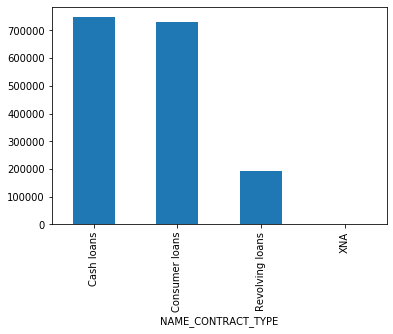

In [9]:
CONTRACT_TYPE.groupby('NAME_CONTRACT_TYPE').size().plot.bar()
CONTRACT_TYPE['NAME_CONTRACT_TYPE'].value_counts()

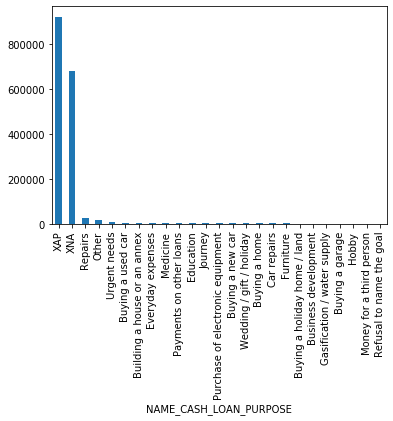

In [10]:
PURPOSE_OF_LOAN_df.groupby('NAME_CASH_LOAN_PURPOSE').size().sort_values(ascending=False).plot.bar()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

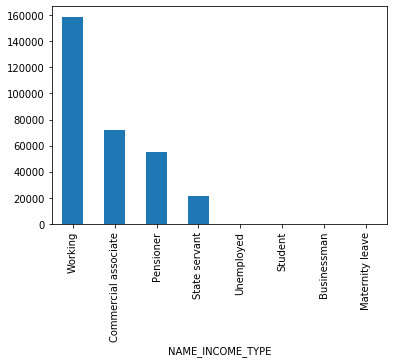

In [11]:
INCOME_SOURCES_df.groupby('NAME_INCOME_TYPE').size().sort_values(ascending=False).plot.bar()
INCOME_SOURCES_df['NAME_INCOME_TYPE'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

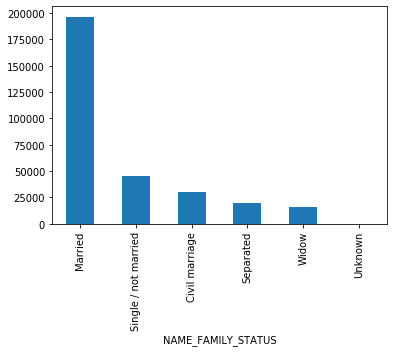

In [12]:
FAMILY_STATUS_df.groupby('NAME_FAMILY_STATUS').size().sort_values(ascending=False).plot.bar()
FAMILY_STATUS_df['NAME_FAMILY_STATUS'].value_counts()

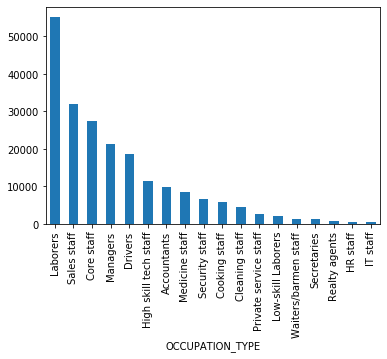

In [13]:
OCCUPATION_df.groupby('OCCUPATION_TYPE').size().sort_values(ascending=False).plot.bar()

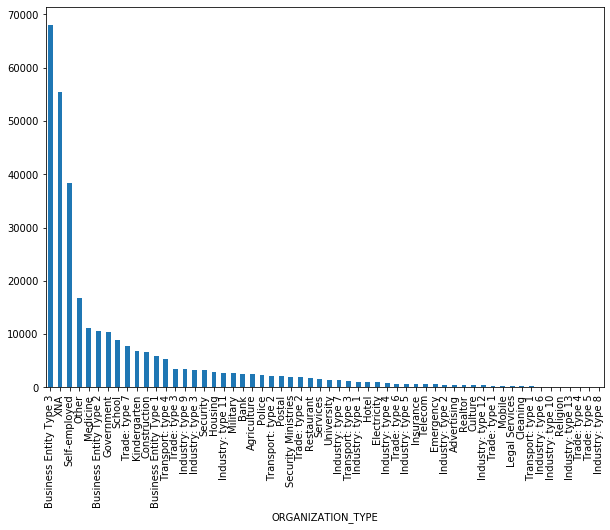

In [14]:
plt.figure(figsize = (10,7))
ORGANIZATION_TYPE_df.groupby('ORGANIZATION_TYPE').size().sort_values(ascending=False).plot.bar()

{'Academic degree': 5, 'Higher education': 4, 'Incomplete higher': 3, 'Secondary / secondary special': 2, 'Lower secondary': 1}


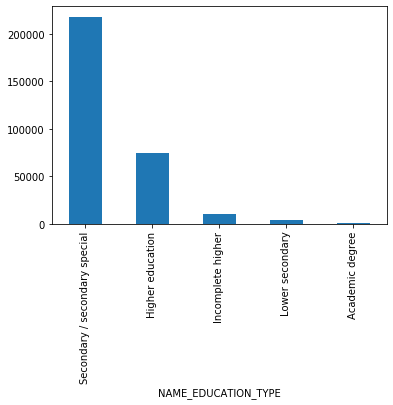

In [15]:
print(educdict)
EDUCATION_TYPE_df.groupby('NAME_EDUCATION_TYPE').size().sort_values(ascending=False).plot.bar()

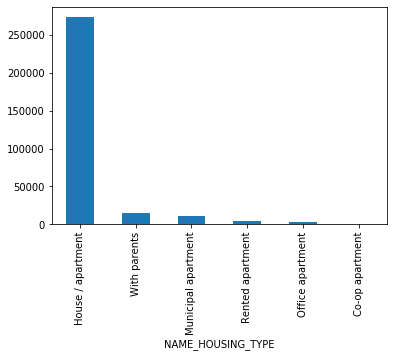

In [16]:
HOUSING_TYPE_df.groupby('NAME_HOUSING_TYPE').size().sort_values(ascending=False).plot.bar()

TARGET
0    569567
1     57197
dtype: int64


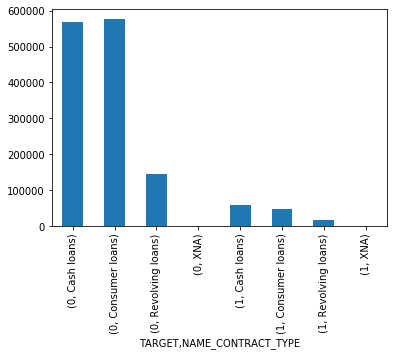

In [17]:
contract_x_target = CONTRACT_TYPE.merge(INCOME_SOURCES_df, on='SK_ID_CURR')
contract_x_target = contract_x_target.groupby(['TARGET','NAME_CONTRACT_TYPE']).size()
print(contract_x_target.loc[(slice(None), 'Cash loans')])
contract_x_target.plot.bar()
# print(contract_x_target[0]/contract_x_target[0].sum())
# print(contract_x_target[1]/contract_x_target[1].sum())
# 5 % higher change to not default a consumer loan not sure if significant
# figure out how to make the bar % proportions (maybe.apply?)
#maybe run a t test if they really are the same
#try making 2 subplots if you really cant make it on the same plot

In [18]:
INCOME_SOURCES_df = apptrain[['NAME_INCOME_TYPE','SK_ID_CURR', 'TARGET']]
income_x_target = INCOME_SOURCES_df.groupby(['TARGET','NAME_INCOME_TYPE']).size()


income_x_target.loc[0,:] = income_x_target.loc[0] / income_x_target.loc[0].sum()
income_x_target.loc[1,:] = income_x_target.loc[1] / income_x_target.loc[1].sum()
print(income_x_target)
# new.plot.bar()
# income_x_zero = income_x_target[0]/income_x_target[0].sum()
# income_x_one = income_x_target[1]/income_x_target[1].sum()

# # print(income_x_target[0]/income_x_target[0].sum())
# # print(income_x_target[1]/income_x_target[1].sum())

# new = pd.DataFrame()
# new[0] = income_x_target[0]/income_x_target[0].sum()
# new[1] = income_x_target[1]/income_x_target[1].sum()

# # new.plot.bar()

# # compute confidence interval
# p1 = income_x_zero['Working']
# p2 = income_x_one['Working']
# difference = p1 -p2



# z = 1.96
# standarderror = math.sqrt(((p1*(1-p1))/len(INCOME_SOURCES_df[INCOME_SOURCES_df['TARGET']==0])) +(p2*(1-p2))/len(INCOME_SOURCES_df[INCOME_SOURCES_df['TARGET']==1]))

# lower_income_conf = difference - 1.96*standarderror
# upper_income_conf = difference + 1.96*standarderror

# print(lower_income_conf, ' up to ', upper_income_conf)
# # print(difference)

# there is at least a 9.9% difference in the two working groups

TARGET  NAME_INCOME_TYPE    
0       Businessman            NaN
        Commercial associate   NaN
        Maternity leave        NaN
        Pensioner              NaN
        State servant          NaN
        Student                NaN
        Unemployed             NaN
        Working                NaN
1       Commercial associate   NaN
        Maternity leave        NaN
        Pensioner              NaN
        State servant          NaN
        Unemployed             NaN
        Working                NaN
dtype: float64


In [19]:
FAMILY_STATUS_df = apptrain[['NAME_FAMILY_STATUS','SK_ID_CURR', 'TARGET']]

fam_x_target = FAMILY_STATUS_df.groupby(['TARGET','NAME_FAMILY_STATUS']).size()
print(fam_x_target[0]/fam_x_target[0].sum())
fam_x_target[1]/fam_x_target[1].sum()

# for single people


# for marries people



NAME_FAMILY_STATUS
Civil marriage          0.094854
Married                 0.642345
Separated               0.064206
Single / not married    0.144991
Unknown                 0.000007
Widow                   0.053597
dtype: float64


NAME_FAMILY_STATUS
Civil marriage          0.119275
Married                 0.598187
Separated               0.065257
Single / not married    0.179537
Widow                   0.037744
dtype: float64

In [ ]:
'''
^ here we can see that there seems to be a higher proportion of married individuals who pay of their loans than those who default.
(first set of data is those who paid, second set are those who defaulted)
'''

In [21]:
educ_x_target = EDUCATION_TYPE_df.groupby(['TARGET','NAME_EDUCATION_TYPE']).size()
print(educ_x_target[0]/educ_x_target[0].sum())
print(educ_x_target[1]/educ_x_target[1].sum())
# Secondary / secondary special 0.78646 more likely to default?

#pop prop diff
(educ_x_target[0,'Secondary / secondary special']/educ_x_target[0].sum())

NAME_EDUCATION_TYPE
Academic degree                  0.000570
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Secondary / secondary special    0.703491
dtype: float64
NAME_EDUCATION_TYPE
Academic degree                  0.000121
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Secondary / secondary special    0.786465
dtype: float64


0.7034907989783717

In [ ]:
'''
here we see that there is a higher proportion of people who  finish higher education that pay of their loans vs those who default
the opposite is true for those who only finish secondary school, being that a higher proportion of those who only finish secondary
school default on loans than those who finish secondary school and pay off their loans
(first set of data is those who paid, second set are those who defaulted)
'''

In [22]:
genderxtarget = apptrain.groupby(['TARGET','CODE_GENDER']).size()
print(genderxtarget[0]/genderxtarget[0].sum())
print(genderxtarget[1]/genderxtarget[1].sum())

CODE_GENDER
F      0.666032
M      0.333954
XNA    0.000014
dtype: float64
CODE_GENDER
F    0.570796
M    0.429204
dtype: float64


In [ ]:
'''
males seen to have a higher proportion of defaulting, compared to females which have more females paying their loans

'''

In [ ]:
'''
now we see that there are differences we have to check whether or not these differences are statistically significant or just
a product of random chance. we do this by conducting t tests
'''

In [34]:
creditamtxtargetdiff = amt_credit_total.groupby('TARGET')['AMT_CREDIT'].mean()
zero_target_credit = apptrain[apptrain['TARGET']== 0]['AMT_CREDIT'].describe()
one_target_credit = apptrain[apptrain['TARGET']== 1]['AMT_CREDIT'].describe()
difference = creditamtxtargetdiff[0] - creditamtxtargetdiff[1]
standard_error = math.sqrt((zero_target_credit['std']**2/len(apptrain[apptrain['TARGET']== 0]['AMT_CREDIT']))+(one_target_credit['std']**2/len(apptrain[apptrain['TARGET']== 1]['AMT_CREDIT'])))
# (difference - 0)/math.sqrt((zero_target_credit['std']**2/len(apptrain[apptrain['TARGET']== 0]['AMT_CREDIT']))+(one_target_credit['std']**2/len(apptrain[apptrain['TARGET']== 1]['AMT_CREDIT'])))
z_stat = 1.96

z_stat * standard_error
print('the true difference between the two groups is around ' ,f'{difference-standard_error} up to {difference+standard_error}')
# print(creditamtxtargetdiff)
print(f'the zscore is {difference/standard_error} which is much higher than 2 which is the cutoff for 95% confidence')
# check assumption of pooled or unpooled variance

the true difference between the two groups is around  42541.66078733888 up to 47197.847869106314
the zscore is 19.273175042266793 which is much higher than 2 which is the cutoff for 95% confidence


In [47]:
print('interestingly enough those who default are statistically going to borrow less money than those who dont default')

interestingly enough those who default are statistically going to borrow less money than those who dont default


'''
there is a statistical difference in how much people loan from the bank between those who default and those who dont
with those defaulting on average borrowing 44,869 less than their loan paying counterparts
'''

In [37]:

# check the debt to income ratio and the probability of default
amt_credit_total['amt_credit / amt_income'] = amt_credit_total['AMT_CREDIT'] / amt_credit_total['AMT_INCOME_TOTAL']
income_sources = INCOME_SOURCES_df.copy()[['NAME_INCOME_TYPE','SK_ID_CURR']].set_index('SK_ID_CURR')
income_x_cred_ratio = amt_credit_total.join(income_sources)
working_x_ratio_zero = income_x_cred_ratio.copy()[(income_x_cred_ratio['NAME_INCOME_TYPE'] == 'Working') & (income_x_cred_ratio['TARGET']==0)]
working_x_ratio_one = income_x_cred_ratio.copy()[(income_x_cred_ratio['NAME_INCOME_TYPE'] == 'Working') & (income_x_cred_ratio['TARGET']==1)]

# mean difference between two groups

working_x_ratio_zero_describe = working_x_ratio_zero['amt_credit / amt_income'].describe()
working_x_ratio_one_describe = working_x_ratio_one['amt_credit / amt_income'].describe()

mean_difference =  working_x_ratio_one_describe['mean'] - working_x_ratio_zero_describe['mean']
z = 1.96
standard_error = math.sqrt(((working_x_ratio_zero_describe['std']**2)/len(working_x_ratio_zero)) + ((working_x_ratio_one_describe['std']**2)/len(working_x_ratio_one)))

lower_mean_diff = mean_difference - z*standard_error
upper_mean_diff = mean_difference + z*standard_error

print(lower_mean_diff, ' up to ', upper_mean_diff)

# print(standard_error)
print(mean_difference, ' the mean diff')
print(mean_difference/standard_error, 'z-score')

-0.15533021823281984  up to  -0.07339661084273591
-0.11436341453777787  the mean diff
-5.4715592205494135 z-score


interestingly enough we see that there is a 0.15 up to a 0.07 difference between the credit to income ratio among the population
of working people who default and those who dont. with ironically those who default having a lower debt to income ratio which
is somewhat counter intuitive


we check whether or not there is a statistical difference between those who default and those who pay based on their
debt to income ratio. logic tells us that those with higher debt to income ratio would more likely default as their income
would not be enough to pay their debt. counter intuitvely though we find here that among those working
it seems that those who pay their loans seem to have a higher debt to income ratio. this might be because
we're using amt credit as the numerator for debt and income as the denominator for this ratio. this might be unfair
as credit is not time bound while income is. meaning some large credits can actually be composed of many smaller payments 
spaced throughout time. we remedy this by using amount annuity next instead of just amount credit


In [52]:
annuity_x_income = apptrain.copy()[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'TARGET', 'NAME_INCOME_TYPE']]
annuity_x_income['ratio'] = annuity_x_income.copy()['AMT_ANNUITY'] /annuity_x_income.copy()['AMT_INCOME_TOTAL']

annuity_x_income_zero = annuity_x_income[(annuity_x_income['NAME_INCOME_TYPE']=='Working')& (annuity_x_income['TARGET']==0)]['ratio'].dropna()
annuity_x_income_one = annuity_x_income[(annuity_x_income['NAME_INCOME_TYPE']=='Working')& (annuity_x_income['TARGET']==1)]['ratio'].dropna()

#describing the difference
annuity_x_income_zero_describe = annuity_x_income_zero.describe()
annuity_x_income_one_describe = annuity_x_income_one.describe()

#mean diff
mean_diff =   annuity_x_income_one_describe['mean'] -  annuity_x_income_zero_describe['mean']
z = 1.96
standard_error = math.sqrt((annuity_x_income_zero_describe['std']**2/len(annuity_x_income_zero)) + (annuity_x_income_one_describe['std']**2/len(annuity_x_income_one)))

print(f'the confidence interval is {mean_diff-z*standard_error} up to {mean_diff+z*standard_error}')
print(f'z score is {mean_diff/standard_error}')

annuity_x_income['ratio'].describe()

the confidence interval is 0.004165144675605591 up to 0.007211686222065961
z score is 7.3193121509680035


count    307499.000000
mean          0.180930
std           0.094574
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: ratio, dtype: float64

surely enough changing the metric from credit to annuity gave us the logical insight. i think this is a more fair comparison.
it shows that on average those who default have around a 0.0041 up to  0.0072 ratio higher than those who pay. these are statististically
significant meaning the true difference is unlikely to be 0 though we are not sure if this practically significant for human
analysists to go off as the difference is small, this information may still be usefull for an ml algorithm or even other scenarios
if we dive a bit deeper

In [ ]:
next we check whether or not the proportions we saw earlier with regards to working and education were significant differences and not
just from random chance. we do this again by using t- tests. results shown below, where both education and working show
significant results such that a higher proportion of those with higher education paid their loans. further more this was true
even when we account for the fact that they had high debt to income ratios. for working populations we see that there is a significant
proportion higher of them defaulting than those who pay. this may bean area to look at. Home credit's screening system might be
slightly biased to working individuals thinking that they'll be able to pay since they have a job, while this is logical
having a 9 - 11% difference in proportion for those who default between 2 groups of working customers is significant
and other criterias may be looked at more closely to reduce the impact of the working status on the loan approval, and ultimately
reduce this proportional difference

In [27]:
educdict = {'Academic degree':1,'Higher education':1,'Incomplete higher':1, 'Secondary / secondary special': 0, 'Lower secondary':0}


In [28]:
educdict = {'Academic degree':1,'Higher education':1,'Incomplete higher':1, 'Secondary / secondary special': 0, 'Lower secondary':0}

annuity_x_income = apptrain.copy()[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'TARGET', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','SK_ID_CURR']]
annuity_x_income['NAME_EDUCATION_TYPE'] = annuity_x_income['NAME_EDUCATION_TYPE'].replace(educdict)

annuity_x_income['ratio_debt'] = annuity_x_income.copy()['AMT_ANNUITY'] /annuity_x_income.copy()['AMT_INCOME_TOTAL']
annuity_x_income['ratio_debt_top or bottom 50'] = annuity_x_income['ratio_debt'].apply(lambda x: 1 if x >= 0.162833 else 0)



#groups

highratio_default_working = annuity_x_income[(annuity_x_income['ratio_debt_top or bottom 50'] == 1) & (annuity_x_income['TARGET'] == 1)& (annuity_x_income['NAME_INCOME_TYPE'] == 'Working')]
highratio_paid_working = annuity_x_income[(annuity_x_income['ratio_debt_top or bottom 50'] == 1) & (annuity_x_income['TARGET'] == 0)& (annuity_x_income['NAME_INCOME_TYPE'] == 'Working')]
lowratio_paid_working = annuity_x_income[(annuity_x_income['ratio_debt_top or bottom 50'] == 0) & (annuity_x_income['TARGET'] == 0)& (annuity_x_income['NAME_INCOME_TYPE'] == 'Working')]
lowratio_default_working = annuity_x_income[(annuity_x_income['ratio_debt_top or bottom 50'] == 0) & (annuity_x_income['TARGET'] == 1)& (annuity_x_income['NAME_INCOME_TYPE'] == 'Working')]

educdict = {'Academic degree':1,'Higher education':1,'Incomplete higher':1, 'Secondary / secondary special': 0, 'Lower secondary':0}

x = highratio_default_working.groupby('NAME_EDUCATION_TYPE').size() / highratio_default_working.groupby('NAME_EDUCATION_TYPE').size().sum()
# lowratio_default_working.groupby('NAME_EDUCATION_TYPE').size()
y = highratio_paid_working.groupby('NAME_EDUCATION_TYPE').size() / highratio_paid_working.groupby('NAME_EDUCATION_TYPE').size().sum()
print(x, 'highratio default')
print(y, 'highratio paid')
pop1 = highratio_default_working['NAME_EDUCATION_TYPE']
pop2 = highratio_paid_working['NAME_EDUCATION_TYPE']


# difference between high ratio, lower education vs paid and unpaid groups (negative means more paid)
mean_diff_1 = x[0] - y[0]
ztest_1 = 1.96
standard_error_1 = math.sqrt((x[0]*(1-x[0])/len(pop1)) + (y[0]*(1-y[0])/len(pop2)))
print('z statistic is ', mean_diff_1/standard_error_1)
print('lower conf ', mean_diff_1 - ztest_1*standard_error_1)
print('Higher conf ', mean_diff_1 + ztest_1*standard_error_1)

# difference between high ratio, higher education vs paid and unpaid groups (negative means more paid)
mean_diff_2 = x[1] - y[1]
ztest_2 = 1.96
standard_error_2 = math.sqrt((x[1]*(1-x[1])/len(pop1)) + (y[1]*(1-y[1])/len(pop2)))
print('z statistic is ', mean_diff_2/standard_error_2)
print('lower conf ', mean_diff_2 - ztest_2*standard_error_2)
print('Higher conf ', mean_diff_2 + ztest_2*standard_error_2)



NAME_EDUCATION_TYPE
0    0.84728
1    0.15272
dtype: float64 highratio default
NAME_EDUCATION_TYPE
0    0.773365
1    0.226635
dtype: float64 highratio paid
z statistic is  17.311729984860843
lower conf  0.06554652898934761
Higher conf  0.08228356083472448
z statistic is  -17.311729984860865
lower conf  -0.08228356083472456
Higher conf  -0.0655465289893477


In [29]:
testdf = annuity_x_income[(annuity_x_income['ratio_debt_top or bottom 50'] == 1)& (annuity_x_income['NAME_INCOME_TYPE'] == 'Working')&(annuity_x_income['TARGET'] == 1)]
test = annuity_x_income[(annuity_x_income['ratio_debt_top or bottom 50'] == 1)& (annuity_x_income['NAME_INCOME_TYPE'] == 'Working')].groupby('TARGET').size()
test = test / test.sum()
test

# difference between high ratio, lower education vs paid and unpaid groups (negative means more paid)
mean_diff_1 = x[0] - test[1]
ztest_1 = 1.96
standard_error_1 = math.sqrt((x[0]*(1-x[0])/len(pop1)) + (test[1]*(1-test[1])/len(testdf)))
print('z statistic is ', mean_diff_1/standard_error_1)
print('lower conf ', mean_diff_1 - ztest_1*standard_error_1)
print('Higher conf ', mean_diff_1 + ztest_1*standard_error_1)

# difference between high ratio, higher education vs paid and unpaid groups (negative means more paid)
mean_diff_2 = x[1] - test[1]
ztest_2 = 1.96
standard_error_2 = math.sqrt((x[1]*(1-x[1])/len(testdf)) + (test[1]*(1-test[1])/len(testdf)))
print('z statistic is ', mean_diff_2/standard_error_2)
print('lower conf ', mean_diff_2 - ztest_2*standard_error_2)
print('Higher conf ', mean_diff_2 + ztest_2*standard_error_2)

z statistic is  143.24613857469467
lower conf  0.7344303246663281
Higher conf  0.754807177638143
z statistic is  9.630126983031198
lower conf  0.03987067597152454
Higher conf  0.06024752894333935


-0.11177786360947799  up to  -0.09911317709693108


Text(0, 0.5, 'proportion paid')

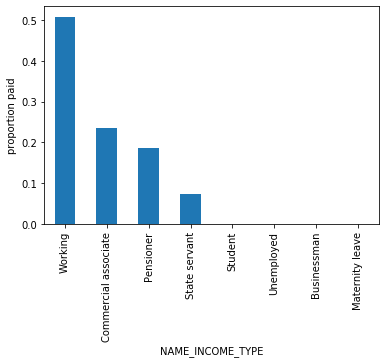

In [30]:
INCOME_SOURCES_df = apptrain[['NAME_INCOME_TYPE','SK_ID_CURR', 'TARGET']]
income_x_target = INCOME_SOURCES_df.groupby(['TARGET','NAME_INCOME_TYPE']).size().sort_values()

income_x_zero = income_x_target[0]/income_x_target[0].sum()
income_x_one = income_x_target[1]/income_x_target[1].sum()

(income_x_target[0]/income_x_target[0].sum()).sort_values(ascending=False).plot(kind='bar')


# compute confidence interval
p1 = income_x_zero['Working']
p2 = income_x_one['Working']
difference = p1 -p2

z = 1.96
standarderror = math.sqrt(((p1*(1-p1))/len(INCOME_SOURCES_df[INCOME_SOURCES_df['TARGET']==0])) +(p2*(1-p2))/len(INCOME_SOURCES_df[INCOME_SOURCES_df['TARGET']==1]))

lower_income_conf = difference - 1.96*standarderror
upper_income_conf = difference + 1.96*standarderror

print(lower_income_conf, ' up to ', upper_income_conf)
# print(difference)

# there is at least a 9.9% difference in the two working groups
plt.ylabel('proportion paid')

Text(0, 0.5, 'proportion of default')

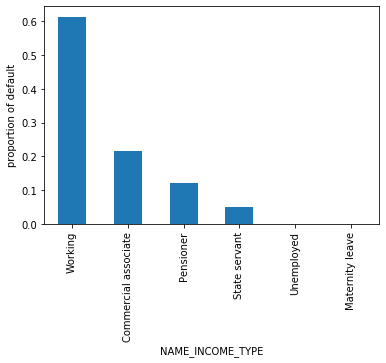

In [31]:
(income_x_target[1]/income_x_target[1].sum()).sort_values(ascending = False).plot(kind='bar')
plt.ylabel('proportion of default')